1) Imports

# Contrastive Learning with K-Means (Mall Dataset)

This notebook demonstrates a clean, step-by-step pipeline for:
1. Loading and preprocessing the Mall Customers dataset
2. Applying K-Means clustering
3. Learning a lightweight contrastive embedding using LDA
4. Re-applying K-Means in the contrastive space
5. Visualizing and evaluating results


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score




In [2]:
# 1️⃣ Select dataset file
mall_path = r"C:\Users\70829\Downloads\Mall_Customers_Segmentation_main\Dataset\Mall_Customers.csv"

# 2️⃣ Load dataset
df_mall = pd.read_csv(mall_path)
print(df_mall.head())

# 3️⃣ Select features
mall_features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X_mall = df_mall[mall_features].dropna().values

# 4️⃣ Scale data
scaler = StandardScaler()
X_mall_scaled = scaler.fit_transform(X_mall)


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
import numpy as np

def simple_kmeans(X, n_clusters, n_iters=100, random_state=42):
    """
    Very simple K-Means implementation using NumPy only.
    X: (n_samples, n_features) array
    Returns:
        labels: cluster index for each sample
        centers: cluster centers
    """
    rng = np.random.RandomState(random_state)
    n_samples = X.shape[0]

    # 1) Initialize centroids by picking random points
    centers = X[rng.choice(n_samples, n_clusters, replace=False)]

    for it in range(n_iters):
        # 2) Assign each point to nearest centroid
        #    distances: (n_samples, n_clusters)
        distances = ((X[:, None, :] - centers[None, :, :]) ** 2).sum(axis=2)
        labels = distances.argmin(axis=1)

        # 3) Recompute centroids
        new_centers = np.zeros_like(centers)
        for k in range(n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                new_centers[k] = cluster_points.mean(axis=0)
            else:
                # if a cluster is empty, reinitialize it randomly
                new_centers[k] = X[rng.randint(0, n_samples)]

        # 4) Check convergence
        if np.allclose(new_centers, centers):
            break
        centers = new_centers

    return labels, centers


In [4]:
k_mall = 5
mall_labels, mall_centers = simple_kmeans(X_mall_scaled, n_clusters=k_mall, n_iters=100, random_state=42)


Silhouette (original space): 0.41664341513732767


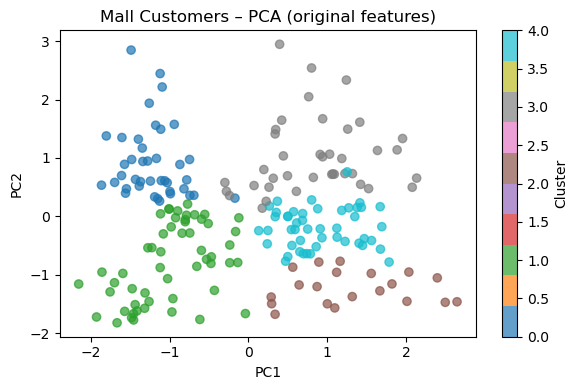

In [5]:


print("Silhouette (original space):",
      silhouette_score(X_mall_scaled, mall_labels))

pca = PCA(n_components=2)
X_mall_pca = pca.fit_transform(X_mall_scaled)

plt.figure(figsize=(6,4))
plt.scatter(X_mall_pca[:,0], X_mall_pca[:,1],
            c=mall_labels, cmap='tab10', alpha=0.7)
plt.colorbar(label="Cluster")
plt.title("Mall Customers – PCA (original features)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout()
plt.show()


LDA “contrastive”

Silhouette (LDA space, same labels): 0.34166891089647583


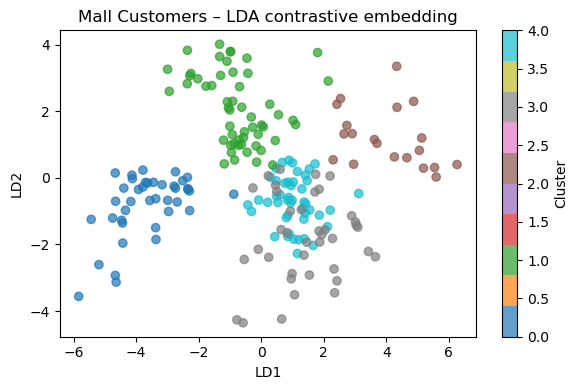

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda_mall = LDA(n_components=2)
X_mall_lda = lda_mall.fit_transform(X_mall_scaled, mall_labels)

print("Silhouette (LDA space, same labels):",
      silhouette_score(X_mall_lda, mall_labels))

plt.figure(figsize=(6,4))
plt.scatter(X_mall_lda[:,0], X_mall_lda[:,1],
            c=mall_labels, cmap='tab10', alpha=0.7)
plt.colorbar(label="Cluster")
plt.title("Mall Customers – LDA contrastive embedding")
plt.xlabel("LD1"); plt.ylabel("LD2")
plt.tight_layout()
plt.show()


also want to re-run K-Means on the LDA space, again

Silhouette (K-Means on LDA embedding): 0.4388586301906783


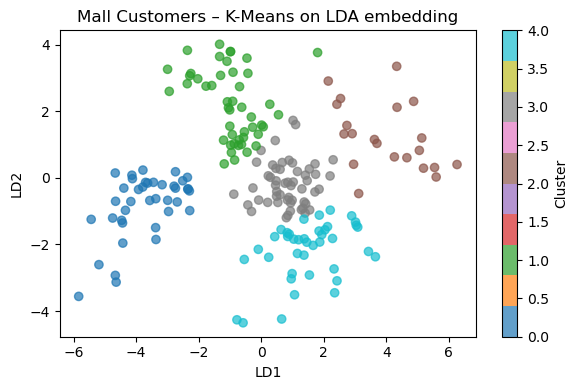

In [7]:
mall_labels_lda, _ = simple_kmeans(X_mall_lda, n_clusters=k_mall, n_iters=100, random_state=42)

print("Silhouette (K-Means on LDA embedding):",
      silhouette_score(X_mall_lda, mall_labels_lda))

plt.figure(figsize=(6,4))
plt.scatter(X_mall_lda[:,0], X_mall_lda[:,1],
            c=mall_labels_lda, cmap='tab10', alpha=0.7)
plt.colorbar(label="Cluster")
plt.title("Mall Customers – K-Means on LDA embedding")
plt.xlabel("LD1"); plt.ylabel("LD2")
plt.tight_layout()
plt.show()


In [8]:
import sklearn, numpy
print("sklearn:", sklearn.__version__)
print("numpy:", numpy.__version__)


sklearn: 1.3.0
numpy: 1.26.2


Mall dataset shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


After dropping NaN rows, X_mall shape: (200, 3)
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


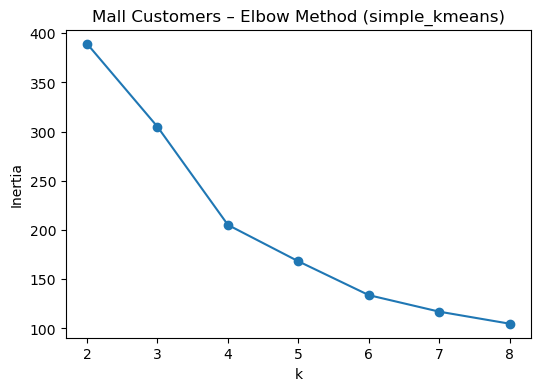

Unique clusters: [0 1 2 3 4]
Silhouette (original scaled space): 0.41664341513732767


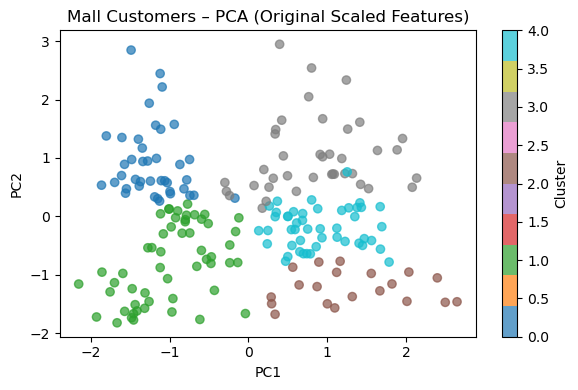

Silhouette (LDA contrastive space, same labels): 0.34166891089647583


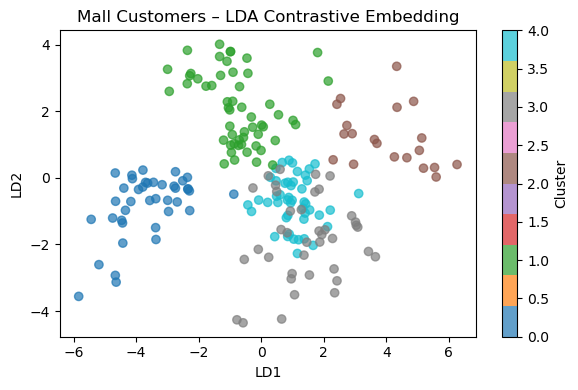

Silhouette (K-Means on LDA embedding): 0.4388586301906783


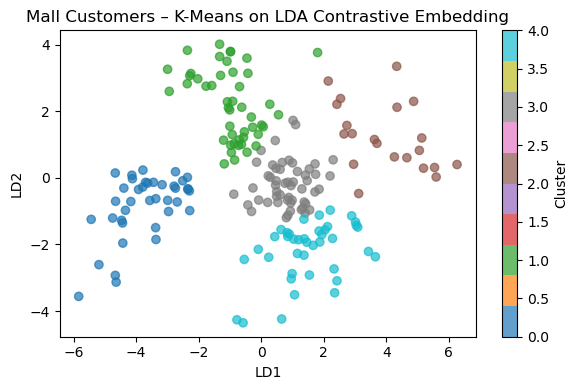

In [9]:
# ==============================
# 1) IMPORTS
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import silhouette_score

# %matplotlib inline  # Uncomment if using Jupyter Notebook


# ==============================
# 2) SIMPLE K-MEANS (NUMPY VERSION)
#    (Skip this if already defined earlier)
# ==============================
def simple_kmeans(X, n_clusters, n_iters=100, random_state=42):
    rng = np.random.RandomState(random_state)
    n_samples = X.shape[0]

    # Random centroid initialization
    centers = X[rng.choice(n_samples, n_clusters, replace=False)]

    for i in range(n_iters):
        # Compute distances and assign clusters
        distances = ((X[:, None, :] - centers[None, :, :]) ** 2).sum(axis=2)
        labels = distances.argmin(axis=1)

        # Update centroids
        new_centers = np.zeros_like(centers)
        for k in range(n_clusters):
            cluster_pts = X[labels == k]
            if len(cluster_pts) > 0:
                new_centers[k] = cluster_pts.mean(axis=0)
            else:
                new_centers[k] = X[rng.randint(0, n_samples)]

        if np.allclose(centers, new_centers):
            break
        centers = new_centers

    return labels, centers


# ==============================
# 3) LOAD MALL DATASET
# ==============================
mall_path = r"C:\Users\70829\Downloads\Mall_Customers_Segmentation_main\Dataset\Mall_Customers.csv"

df_mall = pd.read_csv(mall_path)
print("Mall dataset shape:", df_mall.shape)
display(df_mall.head())

# Selected numerical features
mall_features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

mall_data = df_mall[mall_features].dropna()
X_mall = mall_data.values

print("After dropping NaN rows, X_mall shape:", X_mall.shape)
print(mall_data.describe())


# ==============================
# 4) SCALE DATA
# ==============================
scaler_mall = StandardScaler()
X_mall_scaled = scaler_mall.fit_transform(X_mall)


# ==============================
# 5) OPTIONAL ELBOW CURVE
# ==============================
inertias = []
K_range = range(2, 9)

for k in K_range:
    labels_k, centers_k = simple_kmeans(X_mall_scaled, n_clusters=k, n_iters=100)
    dists = ((X_mall_scaled - centers_k[labels_k]) ** 2).sum(axis=1)
    inertias.append(dists.sum())

plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, marker='o')
plt.title("Mall Customers – Elbow Method (simple_kmeans)")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()


# ==============================
# 6) RUN K-MEANS (k = 5 is common for mall dataset)
# ==============================
k_mall = 5
mall_labels, mall_centers = simple_kmeans(
    X_mall_scaled,
    n_clusters=k_mall,
    n_iters=100,
    random_state=42
)

print("Unique clusters:", np.unique(mall_labels))
print("Silhouette (original scaled space):",
      silhouette_score(X_mall_scaled, mall_labels))


# ==============================
# 7) PCA VISUALIZATION
# ==============================
pca_mall = PCA(n_components=2)
X_mall_pca = pca_mall.fit_transform(X_mall_scaled)

plt.figure(figsize=(6,4))
plt.scatter(X_mall_pca[:,0], X_mall_pca[:,1],
            c=mall_labels, cmap='tab10', alpha=0.7)
plt.colorbar(label="Cluster")
plt.title("Mall Customers – PCA (Original Scaled Features)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()


# ==============================
# 8) LDA (CONTRASTIVE EMBEDDING)
# ==============================
lda_mall = LDA(n_components=2)
X_mall_lda = lda_mall.fit_transform(X_mall_scaled, mall_labels)

print("Silhouette (LDA contrastive space, same labels):",
      silhouette_score(X_mall_lda, mall_labels))

plt.figure(figsize=(6,4))
plt.scatter(X_mall_lda[:,0], X_mall_lda[:,1],
            c=mall_labels, cmap='tab10', alpha=0.7)
plt.colorbar(label="Cluster")
plt.title("Mall Customers – LDA Contrastive Embedding")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.tight_layout()
plt.show()


# ==============================
# 9) K-MEANS AGAIN ON LDA EMBEDDING
# ==============================
mall_labels_lda, mall_centers_lda = simple_kmeans(
    X_mall_lda,
    n_clusters=k_mall,
    n_iters=100,
    random_state=42
)

print("Silhouette (K-Means on LDA embedding):",
      silhouette_score(X_mall_lda, mall_labels_lda))


plt.figure(figsize=(6,4))
plt.scatter(X_mall_lda[:,0], X_mall_lda[:,1],
            c=mall_labels_lda, cmap='tab10', alpha=0.7)
plt.colorbar(label="Cluster")
plt.title("Mall Customers – K-Means on LDA Contrastive Embedding")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.tight_layout()
plt.show()
